In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
import os
from gensim.models.keyedvectors import KeyedVectors
import numpy as np
os.chdir('/gdrive/My Drive/NLP_Project_Programs/Paper_Implementation')
os.listdir()

['Vector Representation of Words',
 'lexicons',
 'Evaluation_Benchmarks',
 'retrofit.ipynb',
 '__pycache__',
 'retrofit.py',
 'toefl_2.ipynb',
 'Check Retrofitted Google Vecs.ipynb',
 'Copy of GoogleNews-vectors-negative300.bin',
 'Retrofitted_WordVecs Google_Debug.ipynb',
 'Skip_Gram_Retrofit+All_Benchmark.ipynb',
 'Word Similarity Tasks.ipynb',
 'Retrofitted_WordVecs.ipynb',
 'SynRelns.ipynb',
 'toefl.ipynb',
 'Sentiment Analysis.ipynb',
 'GIF_heatmap.ipynb',
 'wordvecs_viz.gif']

In [0]:
wt = np.array([1,2,4])

In [0]:
words_list = ['book', 'paper', 'newspaper', 'report' , 'notebook' ] 


In [5]:
import argparse
import gzip
import math
import numpy
import re
import sys
  
from copy import deepcopy

isNumber = re.compile(r'\d+.*')
def norm_word(word):
  if isNumber.search(word.lower()):
    return '---num---'
  elif re.sub(r'\W+', '', word) == '':
    return '---punc---'
  else:
    return word.lower()

''' Read all the word vectors and normalize them '''
def read_word_vecs(filename):
  wordVectors = {}
  if filename.endswith('.gz'): fileObject = gzip.open(filename, 'r')
  else: fileObject = open(filename, 'r')
  
  for line in fileObject:
    line = line.strip().lower()
    word = line.split()[0]
    wordVectors[word] = numpy.zeros(len(line.split())-1, dtype=float)
    for index, vecVal in enumerate(line.split()[1:]):
      wordVectors[word][index] = float(vecVal)
    ''' normalize weight vector '''
    wordVectors[word] /= math.sqrt((wordVectors[word]**2).sum() + 1e-6)
    
  sys.stderr.write("Vectors read from: "+filename+" \n")
  return wordVectors
    
''' Read the PPDB word relations as a dictionary '''
def read_lexicon(filename):
  lexicon = {}
  for line in open(filename, 'r', encoding="utf8"):
    words = line.lower().strip().split()
    lexicon[norm_word(words[0])] = [norm_word(word) for word in words[1:]]
  return lexicon

''' Write word vectors to file '''
'''
def print_word_vecs(wordVectors, outFileName):
  sys.stderr.write('\nWriting down the vectors in '+outFileName+'\n')
  outFile = open(outFileName, 'w')  
  for word, values in wordVectors.items():
    outFile.write(word+' ')
    for val in wordVectors[word]:
      outFile.write('%.4f' %(val)+' ')
    outFile.write('\n')      
  outFile.close()
'''
''' Retrofit word vectors to a lexicon '''

def retrofit(wordVecs, lexicon, numIters):
  newWordVecs = deepcopy(wordVecs)
  wvVocab = set(newWordVecs.keys())
  loopVocab = wvVocab.intersection(set(lexicon.keys()))
  
  count = 0
  vec_list = []
  for word in loopVocab:
    if word in words_list : 
        count+=1
        vec_list.append(wordVecs[word][:10])
  word_set_matrix = np.array([vec for vec in vec_list])
  matrices = [word_set_matrix]
  
  #print(word_set_matrix)
  #return
  #if count == 5: 
    #print ("got all!!!!")
    #return 

  for it in range(numIters):
    # loop through every node also in ontology (else just use data estimate)
    
    
    for word in loopVocab:
      wordNeighbours = set(lexicon[word]).intersection(wvVocab)
      numNeighbours = len(wordNeighbours)
      #no neighbours, pass - use data estimate
      if numNeighbours == 0:
        continue
      # the weight of the data estimate if the number of neighbours
      newVec = numNeighbours * wordVecs[word]
      # loop over neighbours and add to new vector (currently with weight 1)
      for ppWord in wordNeighbours:
        newVec += newWordVecs[ppWord]
      newWordVecs[word] = newVec/(2*numNeighbours)
    temp_list = [] 
    for w in words_list:
      temp_list.append(newWordVecs[w][:10])
      temp_matrix = np.array([vec for vec in temp_list])
    matrices.append(temp_matrix)

  #return newWordVecs
  return matrices
  
# if __name__=='__main__':

#   parser = argparse.ArgumentParser()
#   parser.add_argument("-i", "--input", type=str, default=None, help="Input word vecs")
#   parser.add_argument("-l", "--lexicon", type=str, default=None, help="Lexicon file name")
#   parser.add_argument("-o", "--output", type=str, help="Output word vecs")
#   parser.add_argument("-n", "--numiter", type=int, default=10, help="Num iterations")
#   args = parser.parse_args()

  # wordVecs = read_word_vecs(args.input)
  # lexicon = read_lexicon(args.lexicon)
  # numIter = int(args.numiter)
  # outFileName = args.output
  
  # ''' Enrich the word vectors using ppdb and print the enriched vectors '''
  # print_word_vecs(retrofit(wordVecs, lexicon, numIter), outFileName) 


input_vector =  'Vector Representation of Words/3/3_word_vectors.txt'
lexicon = 'lexicons/wordnet-synonyms+.txt'
numiter = 10
#output = 'out_vec_.txt'

wordVecs = read_word_vecs(input_vector)
lexicon = read_lexicon(lexicon)
numIter = int(numiter)
#outFileName = output

''' Enrich the word vectors using ppdb and print the enriched vectors '''
Matrices = retrofit(wordVecs, lexicon, numIter)

Vectors read from: Vector Representation of Words/3/3_word_vectors.txt 


In [6]:
print(len(Matrices))

11


In [7]:
min_arr = []
max_arr = []
for i in range(5):
  min_arr.append(np.amin(Matrices[i]))
  max_arr.append(np.amax(Matrices[i])) 
print(min(min_arr))
print(max(max_arr))

-0.3309480466217902
0.31979803563828335


In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import imageio
from IPython.display import HTML

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [0]:
def plot_heat_map(iter):
  fig = plt.figure(figsize = (10,5))
  sns.heatmap(Matrices[iter],annot = True,cmap = my_cmap, vmin = -0.5, vmax = 0.5)
  plt.title("ITERATION-"+str(iter))

  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(),dtype = 'uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

  return image

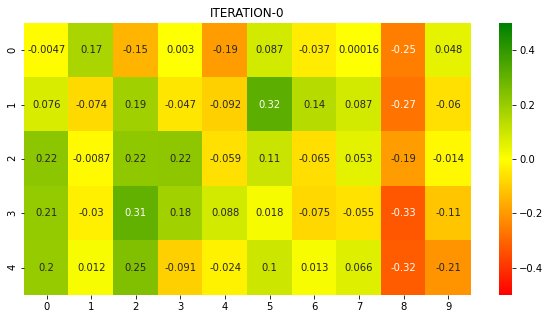

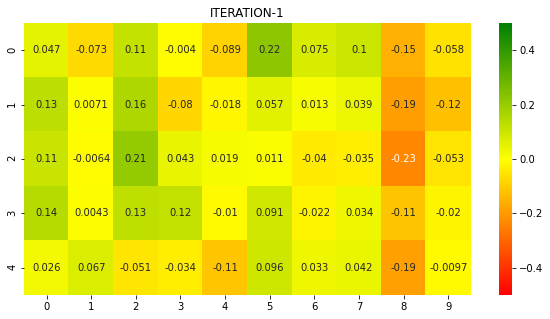

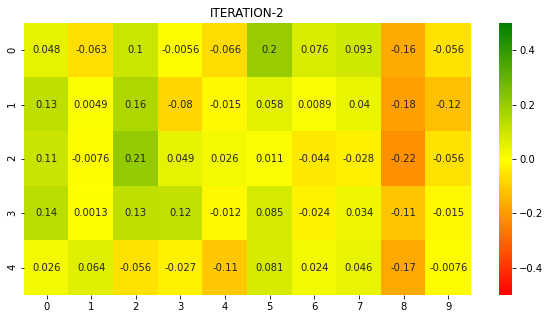

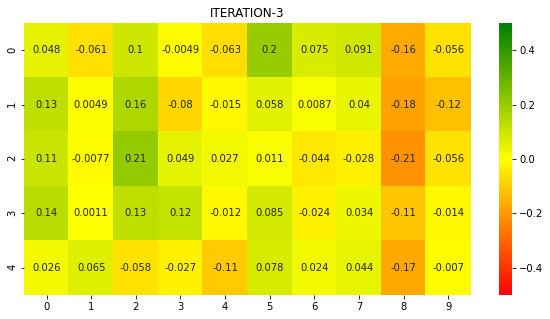

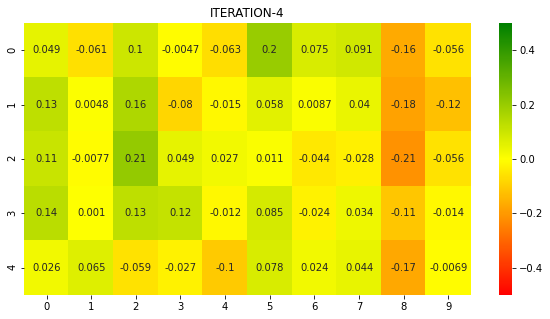

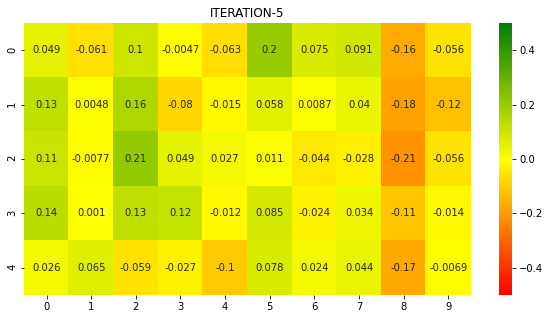

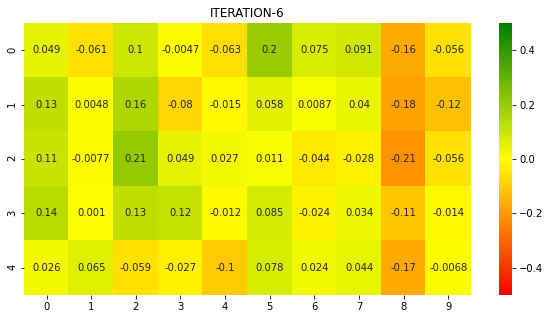

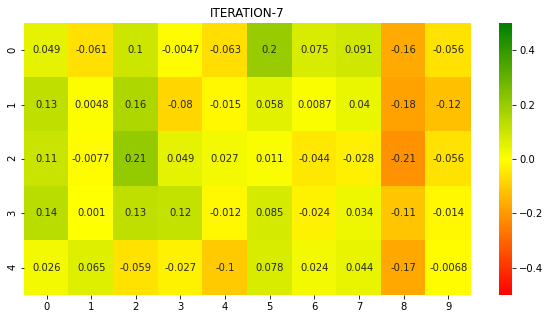

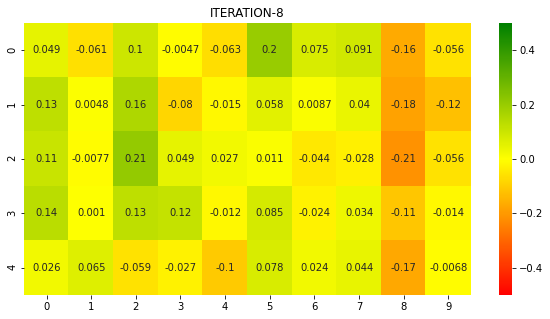

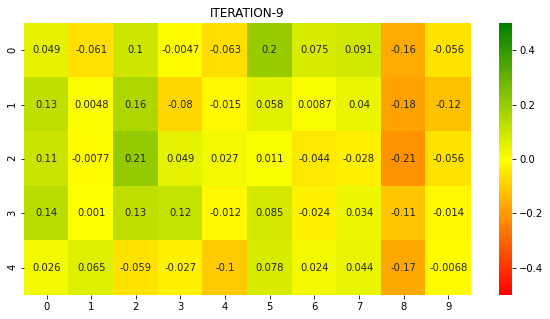

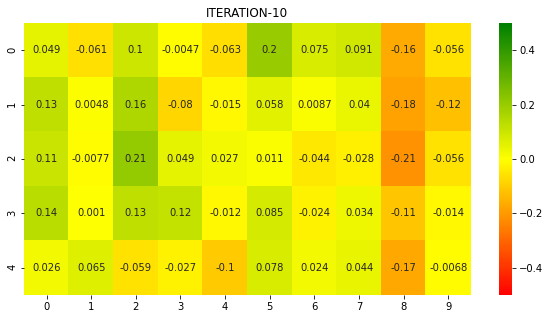

In [28]:
imageio.mimsave('./wordvecs_viz.gif', [plot_heat_map(i) for i in range(0,len(Matrices))],fps =1)

In [29]:
from IPython import display
HTML('<img src="wordvecs_viz.gif">')

In [13]:
a = np.array([[1,2,3],[11,2,23],[33,444,55]])
print(a)

[[  1   2   3]
 [ 11   2  23]
 [ 33 444  55]]


In [14]:
a = [3]
b = []
b.append(3)
print(a)
print(b)

[3]
[3]
